# Making the Mass to Light Band Plot

This notebook takes data from Bahcall and Kulier (2014) and overlays the expected Mass to Light contribution from only galaxies

In [1]:
#import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

h = 0.7

*loading in the data from the paper, which was extracted using WebPlotDigitizer (https://automeris.io/WebPlotDigitizer/?fbclid=IwAR2pHKJpdhxDXiaDGcFxkhW4xtBQfmw8YNnGOMAdjTTAYNlAbQh6ZH-Naz8)*

In [2]:
# low cluster richness
red = pd.read_csv(r'~/Desktop/Intra-Cluster-Light/Data/RED.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

red['m / l_i(r)'] = red['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

 
colorR = ['$6 \leq N \leq 8$']*len(red)

red['Bahcall and Kulier, 2014'] = colorR
errR = np.zeros(len(red))
red['error'] = errR

# medium cluster richness
green = pd.read_csv(r'~/Desktop/Intra-Cluster-Light/Data/GREEN.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

green['m / l_i(r)'] = green['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

colorG = ['$9 \leq N \leq 25$']*len(green)
green['Bahcall and Kulier, 2014'] = colorG
errG = [0, 0,0, 0, 0, 1.02E2*0.7,0, 0, 0, 0,0,0, 0]
green['error'] = errG

# high cluster richness
blue = pd.read_csv(r'~/Desktop/Intra-Cluster-Light/Data/BLUE.csv', 
                  header = None, 
                  names = ['r / r_200', 'm / l_i(r)'])

blue['m / l_i(r)'] = blue['m / l_i(r)'].apply(lambda x: x*h) # changing everything to  h= 0.7

colorB = ['$26 \leq N \leq 220$']*len(blue)
blue['Bahcall and Kulier, 2014'] = colorB
errB = np.zeros(len(blue))
blue['error'] = errB

In [3]:
#combining the datasets
all_colors = pd.concat([red, green,blue], ignore_index=True)
#all_colors

# Now for the fun part. Below, we actually create the plot

[233.4 158.1 158.1]


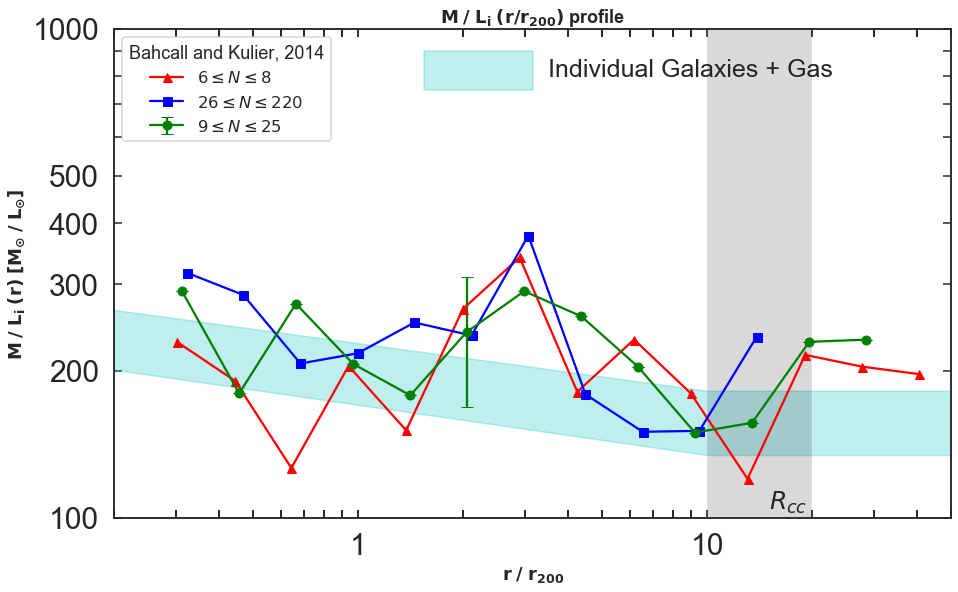

In [4]:
import matplotlib.ticker as ticker

#sns.set_context('paper',rc = {'lines.linewidth' : })
sns.set_context('talk')
sns.set_style('ticks',{"xtick.major.size":8,"ytick.major.size":8})

fig,ax = plt.subplots(figsize = (15,9))

#plotting the sets of data. wanted the error bar just on green, otherwise the caps would show up on the lines
plt.plot(red["r / r_200"],red["m / l_i(r)"],'r-',label = "$6 \leq N \leq 8$",marker = '^')

plt.errorbar(green["r / r_200"],green["m / l_i(r)"],yerr = green.error,fmt = 'g-',\
             label = "$9 \leq N \leq 25$",capsize = 6, marker = 'o')

plt.plot(blue["r / r_200"],blue["m / l_i(r)"],'b-',label = "$26 \leq N \leq 220$",marker = 's')


#scale of plot and axis limits
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(0.2,50)
ax.set_ylim(100,1000)

#x tick labels
x_ticks = [0.1*x for x in range(2,10)] + [x for x in range(1,10)] + [x for x in range(10,50,10)]
x_labels = [str(x) if (x == 1 or x == 10) else '' for x in x_ticks ]
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_labels)

#y tick labels. Something weird was going on but the list is a work around
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText = False))
ax.ticklabel_format(axis = 'y',style = 'plain')
ylabels = ['','', '','','','','','','200','300', '400','500']
ax.set_yticklabels(ylabels,  minor = True)

#putting ticks on top and right
ax.tick_params(axis='both', which = 'both', length = 8, labelsize = 30, bottom = True, top = True, 
               left = True, right = True, direction = 'in', pad = 15)

# plots vertical bar for Rcc
plt.axvspan(10, 20,0, 1, facecolor='k', alpha = 0.15)
plt.text(15, 104, '$R_{cc}$', fontsize = 25)

# rectangle to show what the band is showing, text to label it
plt.axhspan(ymin = 750, ymax = 900, xmin = 0.370, xmax = 0.500, color = 'c',alpha = 0.25)
plt.text(3.5, 800, 'Individual Galaxies + Gas',fontsize = 25)

#plotting the band. This uses a center value with a faint end slope of -1.3, and integrates from 0.0001 (10^-4)
CENTER_VAL_SR = 233.4
CENTER_VAL_LSS = 158.1
total_uncert_SR = 0.14
total_uncert_LSS =0.15

mvsL_center_list = [CENTER_VAL_SR] + [CENTER_VAL_LSS]*2
uncert_list = [total_uncert_SR] + [total_uncert_LSS]*2

mvsL_center_array = np.array(mvsL_center_list)

print(mvsL_center_array)
uncert_array = np.array(uncert_list)

x_band = [0.2,10,50]

y_band_1 = mvsL_center_array*(1+uncert_array)
y_band_2 = mvsL_center_array*(1-uncert_array)

plt.fill_between(x_band,y1 = y_band_1,y2 = y_band_2,color = 'c',alpha = 0.25)

plt.title(r"$\mathbf{M}$ $\mathbf{/}$ $\mathbf{L_{i}}$ $\mathbf{(r / r_{200})}$ profile", fontweight='bold')
plt.xlabel(r"$\mathbf{r}$ $\mathbf{/}$ $\mathbf{r_{200}}$")
plt.ylabel(
r"$\mathbf{M}$ $\mathbf{/}$ $\mathbf{L_{i}}$ $\mathbf{(r)}$ $\mathbf{[M_{\odot}}$ $\mathbf{/}$ $\mathbf{L_{\odot}]}$")

plt.legend(loc = 'upper left', title = 'Bahcall and Kulier, 2014')

plt.savefig('./Figures/Band_plot_new.png')
plt.show()

In [ ]:
import matplotlib.patches as pat
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter

mpl.rcParams['mathtext.fontset'] = 'custom'

# changes the style of plot 
sns.set(rc={'figure.figsize':(30,18)})
sns.set_style('ticks',{"xtick.major.size":8,"ytick.major.size":8})
fig , ax = plt.subplots()

# adjusts the ticks
ax.tick_params(axis='both', which = 'both', length = 8, labelsize = 30, bottom = True, top = True, 
               left = True, right = True, direction = 'in', pad = 15)
ax.ticklabel_format(style='plain', axis = 'both')

#this sets the width of the lines
sns.set_context(rc={"lines.linewidth": 6})

# this makes the actual plot
sns_plot = sns.lineplot(x="r / r_200", y="m / l_i(r)", hue='Bahcall and Kulier, 2014',
            palette={"$6 \leq N \leq 8$": "r", "$9 \leq N \leq 25$": "g", "$26 \leq N \leq 220$": 'b',
                     "30-20": 'k',"20-20": 'c','30-30': 'y', '0.001-0.19': 'k'},
           markers=["^", "o", 's', '<','>','^','s'], markersize = 20, data=all_colors, dashes = False, 
                style = 'Bahcall and Kulier, 2014', legend = 'full')

# sets the axes scales and limits
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlim(0.2,50)
ax.set_ylim(100,1000)

ax.xaxis.set_major_formatter(ScalarFormatter())
ax.yaxis.set_major_formatter(ScalarFormatter())

ylabels = ['','', '','','','','','','200','300', '400','500']
ax.set_yticklabels(ylabels,  minor = True)
# plt.yticks([100, 200, 300, 400, 500,600,700,800,900,1000],['100','200', '300','400','500','600','700','800','900','1000'])

# legend size
plt.legend(prop={'size': 35},loc = 'upper left', fontsize = 12)

# rectangle to show what the band is showing, text to label it
plt.axhspan(ymin = 750, ymax = 900, xmin = 0.330, xmax = 0.500, color = 'c',alpha = 0.35)
plt.text(3.5, 800, 'Individual Galaxies + Gas', fontsize = 35)

# sets the title and axes labels
ax.set_title(r"$\mathbf{M}$ $\mathbf{/}$ $\mathbf{L_{i}}$ $\mathbf{(r / r_{200})}$ profile", fontsize = 45, fontname = "Arial", 
             fontweight='bold', y = 1.03)
ax.set_xlabel(r"$\mathbf{r}$ $\mathbf{/}$ $\mathbf{r_{200}}$", fontsize = 45, fontname = "Arial")

ax.set_ylabel(r"$\mathbf{M}$ $\mathbf{/}$ $\mathbf{L_{i}}$ $\mathbf{(r)}$  $\mathbf{[M_{\odot}}$ $\mathbf{/}$ $\mathbf{L_{\odot}]}$",
              fontsize = 45, fontname = "Arial")

# plots vertical bar for Rcc
plt.axvspan(10, 20,0, 1, facecolor='k', alpha = 0.15)
plt.text(13, 104, '$R_{cc}$', fontsize = 35)

# plots vertical bar for error bar
plt.axvspan(2.030, 2.060,0.228, 0.495, facecolor = 'g', alpha = 0.75)

# and the horizontal bars
plt.axhspan(ymin = 310.5, ymax = 311.5, xmin = 0.410 -0.001, xmax = 0.435 -0.001, color = 'g', alpha = 0.75)
plt.axhspan(ymin = 168, ymax = 169, xmin = 0.409, xmax = 0.434, color = 'g', alpha = 0.75)

plt.show()
fig.savefig('./Figures/kulier.png', dpi = 50)

In [ ]:
from PIL import Image

fig, ax = plt.subplots()
im = Image.open('kulier.png')

fig = im

# Get the current reference
ax = plt.gca()

# Create a Rectangle patch for 15% spread
rectdown = pat.Rectangle((196,465),825,105,linewidth=4,edgecolor='c', facecolor = 'c', 
                         alpha = 0.30,angle = 5.2, fill = True) 
    # starts at m/l = 252 (90% bright, 50% faint), goes down to 195 (bright 30%, faint 20%)
rectflat = pat.Rectangle((1013,538),337,105,linewidth=4,edgecolor='c',facecolor = 'c', 
                         alpha = 0.30,angle = 0, fill = True)

# create a Rectangular patch for 10% spread
tendown = pat.Rectangle((190,465),830,67,linewidth=1,edgecolor='c', facecolor = 'c', 
                        alpha = 0.35,angle = 5.5, fill = True) 

tenflat = pat.Rectangle((1010,545),337,67,linewidth=1,edgecolor='c', facecolor = 'c', 
                        alpha = 0.35,angle = 0, fill = True)


#Rectangular patch for 20% spread centered on 0.001
twendown = pat.Rectangle((190,115),width = 830, height = 75, linewidth=1,edgecolor='r', facecolor = 'r',
                         alpha = 0.35,angle = 0, fill = True) #centered on 219 in solar units

twenflat = pat.Rectangle((190,465),width = 337, height = 75,linewidth=1,edgecolor='r', facecolor = 'r',
                         alpha = 0.35,angle = 0, fill = True) #centered on 169.41in solar units

# Add the patch to the Axes


ax.add_patch(rectdown)
ax.add_patch(rectflat)
#ax.add_patch(tendown)
#ax.add_patch(tenflat)
#ax.add_patch(twendown)
#ax.add_patch(twenflat)

ax.set_yticklabels([])
ax.set_xticklabels([])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_visible(False)
cur_axes.axes.get_yaxis().set_visible(False)

plt.grid(True)
plt.imshow(im)
plt.savefig('./Figures/OFFICIALBANDPLOT.png')